     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
41            4.5          2.3           1.3          0.3
32            5.2          4.1           1.5          0.1
136           6.3          3.4           5.6          2.4
77            6.7          3.0           5.0          1.7
75            6.6          3.0           4.4          1.4
97            6.2          2.9           4.3          1.3
112           6.8          3.0           5.5          2.1
38            4.4          3.0           1.3          0.2
15            5.7          4.4           1.5          0.4
73            6.1          2.8           4.7          1.2
The accuracy score of K-Mean:  0.8933333333333333


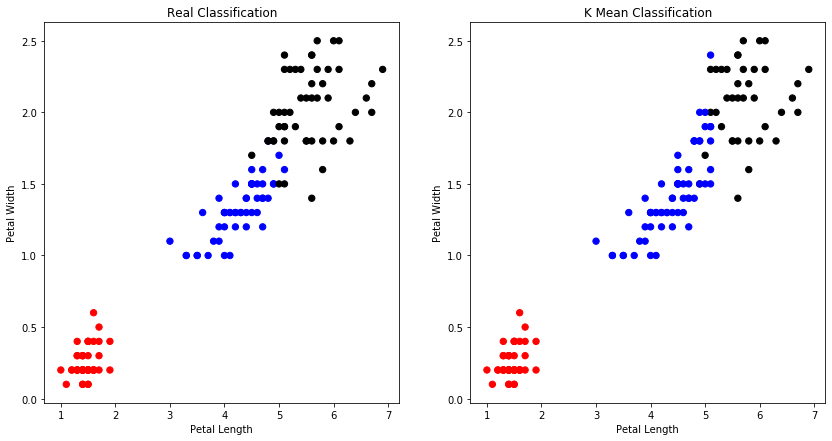

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(X.sample(10))
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'blue', 'black','magenta'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
1       -1.143017    -0.131979     -1.340227    -1.315444
50       1.401508     0.328414      0.535409     0.264142
142     -0.052506    -0.822570      0.762758     0.922303
71       0.310998    -0.592373      0.137547     0.132510
149      0.068662    -0.131979      0.762758     0.790671
6       -1.506521     0.788808     -1.340227    -1.183812
91       0.310998    -0.131979      0.478571     0.264142
113     -0.173674    -1.282963      0.705921     1.053935
116      0.795669    -0.131979      0.990108     0.790671
28      -0.779513     0.788808     -1.340227    -1.315444
The accuracy score of EM:  0.0


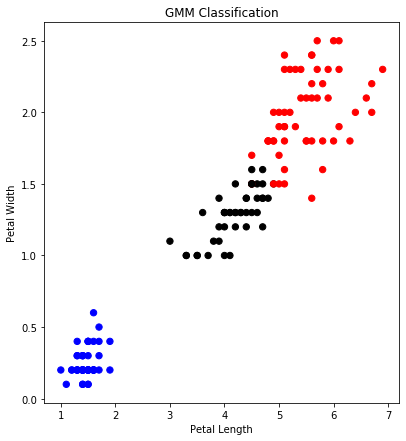

In [2]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print(xs.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))